In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import matplotlib as mpl
mpl.rc('font', family='Noto Sans CJK TC')

## get data-政府開放資料-台灣高中的資訊
https://data.gov.tw/dataset/6089 
* 想看的問題：大台北地區高中公私立比例為何？
* 分台北新北看，公私立的比例又為何？

In [6]:
df =pd.read_csv('http://stats.moe.gov.tw/files/school/107/high.csv')

In [7]:
df.head()
df

,代碼,學校名稱,公私立,縣市名稱,地址,電話,網址,備註
0,010301,國立華僑高級中等學校,公立,[01]新北市,[220]新北市板橋區大觀路一段32號,(02)29684131,http://www.nocsh.ntpc.edu.tw,NaN
1,011301,私立淡江高中,私立,[01]新北市,[251]新北市淡水區真理街26號,(02)26203850,http://www.tksh.ntpc.edu.tw,NaN
2,011302,私立康橋高中,私立,[01]新北市,[231]新北市新店區華城路800號,(02)22166000,http://www.kcbs.ntpc.edu.tw,NaN
3,011306,私立金陵女中,私立,[01]新北市,[241]新北市三重區重新路五段656號,(02)29956776,http://www.glghs.ntpc.edu.tw,NaN
4,011307,新北市裕德高級中等學校,私立,[01]新北市,[236]新北市土城區擺接堡路1號,(02)82617889,http://www.yuteh.ntpc.edu.tw/yuteh/,NaN
5,011309,財團法人南山高中,私立,[01]新北市,[235]新北市中和區廣福路41號,(02)22453000,http://www.nssh.ntpc.edu.tw,NaN
6,011310,財團法人恆毅高中,私立,[01]新北市,[242]新北市新莊區中正路108號,(02)29923619,http://www.hchs.ntpc.edu.tw,NaN
7,011311,私立聖心女中,私立,[01]新北市,[249]新北市八里區龍米路一段263號,(02)26182287,http://www.shgsh.ntpc.edu.tw,NaN
8,011312,私立崇義高中,私立,[01]新北市,[221]新北市汐止區大同路三段68號,(02)86482078,http://www.tyhs.ntpc.edu.tw/,NaN
9,011314,財團法人中華高中,私立,[01]新北市,[236]新北市土城區城林路2號,(02)22693641,http://www.chsh.ntpc.edu.tw,NaN


In [8]:
school_NewTaipeiCity = df[(df['縣市名稱'] == '[01]新北市')]
school_Taipei = df[(df['縣市名稱'] == '[36]臺北市')]

將新北台北兩個縣市合併（感興趣的是大台北地區）

In [18]:
All_Taipei=pd.concat([school_NewTaipeiCity,school_Taipei ])

In [20]:
All_Taipei
#len(All_Taipei)

,代碼,學校名稱,公私立,縣市名稱,地址,電話,網址,備註
0,010301,國立華僑高級中等學校,公立,[01]新北市,[220]新北市板橋區大觀路一段32號,(02)29684131,http://www.nocsh.ntpc.edu.tw,NaN
1,011301,私立淡江高中,私立,[01]新北市,[251]新北市淡水區真理街26號,(02)26203850,http://www.tksh.ntpc.edu.tw,NaN
2,011302,私立康橋高中,私立,[01]新北市,[231]新北市新店區華城路800號,(02)22166000,http://www.kcbs.ntpc.edu.tw,NaN
3,011306,私立金陵女中,私立,[01]新北市,[241]新北市三重區重新路五段656號,(02)29956776,http://www.glghs.ntpc.edu.tw,NaN
4,011307,新北市裕德高級中等學校,私立,[01]新北市,[236]新北市土城區擺接堡路1號,(02)82617889,http://www.yuteh.ntpc.edu.tw/yuteh/,NaN
5,011309,財團法人南山高中,私立,[01]新北市,[235]新北市中和區廣福路41號,(02)22453000,http://www.nssh.ntpc.edu.tw,NaN
6,011310,財團法人恆毅高中,私立,[01]新北市,[242]新北市新莊區中正路108號,(02)29923619,http://www.hchs.ntpc.edu.tw,NaN
7,011311,私立聖心女中,私立,[01]新北市,[249]新北市八里區龍米路一段263號,(02)26182287,http://www.shgsh.ntpc.edu.tw,NaN
8,011312,私立崇義高中,私立,[01]新北市,[221]新北市汐止區大同路三段68號,(02)86482078,http://www.tyhs.ntpc.edu.tw/,NaN
9,011314,財團法人中華高中,私立,[01]新北市,[236]新北市土城區城林路2號,(02)22693641,http://www.chsh.ntpc.edu.tw,NaN


#### 分大台北地區的公私立高中個數

In [21]:
AA=All_Taipei[All_Taipei['公私立']=='公立']
BB=All_Taipei[All_Taipei['公私立']=='私立']
len(AA)
len(BB)

35

#### 畫出大台北地區公私立學校的圓餅圖
發現大台北地區公私立高中比例差不多！

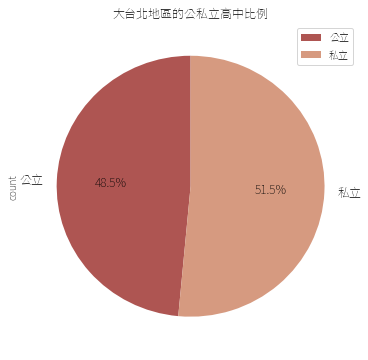

In [17]:
colors = ["#AE5552", "#D69A80"]
df_forplot = pd.DataFrame({'count': [len(AA), len(BB)]},index=['公立', '私立'])
plot = df_forplot.plot.pie(y='count',figsize=(6, 6),shadow=False,startangle=90,autopct='%1.1f%%',  colors=colors,title='大台北地區的公私立高中比例',fontsize=12)

In [ ]:
colors = ["#AE5552", "#D69A80"]
df_forplot = pd.DataFrame({'count': [len(AA), len(BB)]},index=['公立', '私立'])
plot = df_forplot.plot.pie(y='count',figsize=(6, 6),shadow=False,startangle=90,autopct='%1.1f%%',  colors=colors,title='大台北地區的公私立高中比例',fontsize=12)

##### 想細看,公立私立跟新北台北中的比例

In [34]:
N_Public=school_NewTaipeiCity[school_NewTaipeiCity['公私立']=='公立']
N_private=school_NewTaipeiCity[school_NewTaipeiCity['公私立']=='私立']
T_Public=school_Taipei[school_Taipei['公私立']=='公立']
T_private=school_Taipei[school_Taipei['公私立']=='私立']

新北市的圓餅圖

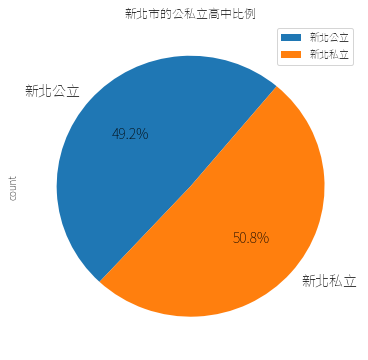

In [37]:
df_forplot = pd.DataFrame({'count': [len(N_Public), len(N_private)]},index=['新北公立', '新北私立'])
plot = df_forplot.plot.pie(y='count',figsize=(6, 6),shadow=False,startangle=50,autopct='%1.1f%%', title='新北市的公私立高中比例',fontsize=14)

台北市的圓餅圖

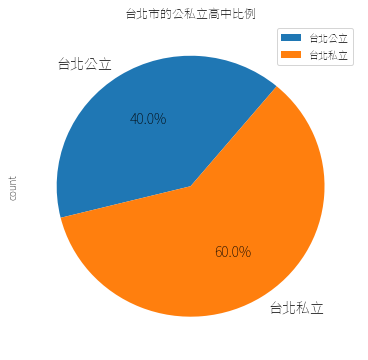

In [38]:
df_forplot = pd.DataFrame({'count': [len(T_Public), len(T_private)]},index=['台北公立', '台北私立'])
plot = df_forplot.plot.pie(y='count',figsize=(6, 6),shadow=False,startangle=50,autopct='%1.1f%%', title='台北市的公私立高中比例',fontsize=14)

## 結論
我一開始把大台北地區的圖想看公私立的比例,感覺好像一半一半？
#### 接下來我在分層細分(分新北市,台北市)

發現新北高中公私立比例確實是一半一半
<br/>但台北高中公私立比例卻是4:6

### 為什麼會這樣？
民眾常常看到合併的圓餅圖就下定論<br/>
有時候必須要分層看看不同地區的結構及'樣本數'<br/>
看這個data中，新北市的高中個數比較多（人口本來就比較多），就會連動影響到台北市公私立的比例<br/>
所以當看到比例資料時，可以想一下是否在新北，台北的高中公私立比例都近乎是1:1呢？

## Fuhtermore：
台北市：我會想分12個行政區看，看看哪一區的高中比例比較高，是否有照著人口比例去分配高中的數目？